In [497]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools

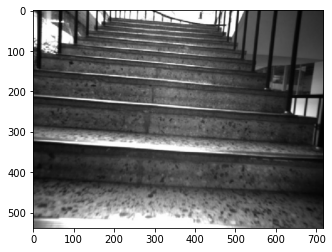

In [517]:
#reading and displaying grayscale input image
my_img = cv2.imread('sample_data/stairs2.png',0)
img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [518]:
kernel = cv2.getGaborKernel((31, 31), 5, 2, 10, 1, 0, cv2.CV_32F)
kernel /= math.sqrt((kernel * kernel).sum())

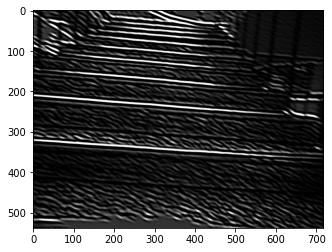

In [519]:
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(filtered)
plt.show()

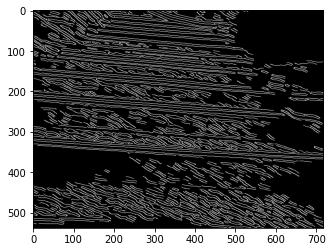

In [520]:
filtered = cv2.cvtColor(filtered, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(filtered,100,200,apertureSize = 3)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(edges)
plt.show()

In [521]:
print (edges.shape)
edges = cv2.cvtColor(edges, cv2.COLOR_RGB2GRAY)
print (edges.shape)

(538, 718, 3)
(538, 718)


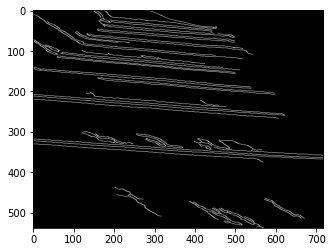

In [522]:
connectivity = 8
min_size = 250
nb_components, output, stats, centroids  = cv2.connectedComponentsWithStats(edges, connectivity,ltype=cv2.CV_32S)
sizes = stats[1:, -1]
nb_components = nb_components - 1
img2 = edges
# for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] < min_size:
        img2[output == i + 1] = 0
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [523]:
for i in range(0,538,50):
  for j in range(0,718,50):
    region = img2[i:(i+50), j:(j+50),0]
    xlist = range(i,(i+50))
    ylist = range(j,(j+50))
    sx = np.sum(xlist)
    sy = np.sum(ylist)
    sxx = np.dot(xlist,xlist)
    syy = np.dot(ylist,ylist)
    sxy = np.dot(xlist, ylist)
    area = 2500
    slope = (area*sxy - sx*sy)/(area*sxx - sx*sx)
    intercept = (sxx*sy - sx*sxy)/(area*sxx-sx*sx)
    print (slope,intercept," ")

1.0 0.0  
2.5072285450630574 0.2614580129191018  
4.014457090126115 0.5229160258382036  
5.521685635189173 0.7843740387573055  
7.02891418025223 1.0458320516764072  
8.536142725315287 1.307290064595509  
10.043371270378346 1.568748077514611  
11.550599815441403 1.8302060904337127  
13.05782836050446 2.0916641033528145  
14.565056905567518 2.3531221162719165  
16.072285450630574 2.614580129191018  
17.57951399569363 2.87603814211012  
19.086742540756692 3.137496155029222  
20.59397108581975 3.3989541679483235  
22.101199630882807 3.6604121808674255  
0.3536072187757581 -0.036874755975879574  
1.0 0.0  
1.6463927812242418 0.036874755975879574  
2.2927855624484836 0.07374951195175915  
2.939178343672726 0.11062426792763871  
3.5855711248969677 0.1474990239035183  
4.2319639061212095 0.18437377987939785  
4.878356687345452 0.22124853585527743  
5.524749468569693 0.258123291831157  
6.171142249793935 0.2949980478070366  
6.817535031018177 0.3318728037829161  
7.463927812242419 0.36874755975

[[[329.          1.6406095]]

 [[146.          1.6580628]]

 [[316.          1.6406095]]

 [[112.          1.6580628]]

 [[321.          1.6406095]]

 [[152.          1.6580628]]

 [[156.          1.6580628]]

 [[141.          1.6580628]]

 [[320.          1.6231562]]

 [[ 76.          1.6580628]]

 [[ 53.          1.6580628]]

 [[ 99.          1.6580628]]

 [[212.          1.6406095]]

 [[ 72.          1.6580628]]

 [[330.          1.6231562]]

 [[ 48.          1.6580628]]

 [[109.          1.6580628]]

 [[ 20.          1.6580628]]

 [[106.          1.6755161]]

 [[205.          1.6580628]]

 [[161.          1.6406095]]

 [[103.          1.6580628]]

 [[ 32.          1.6580628]]

 [[ 93.          1.6580628]]

 [[215.          1.6406095]]

 [[331.          1.6057029]]

 [[326.          1.6231562]]

 [[ 96.          1.6755161]]

 [[117.          1.6406095]]]


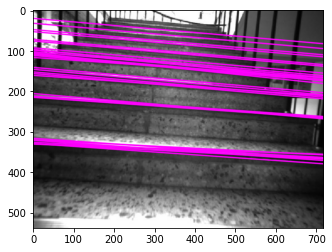

In [524]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
lines = cv2.HoughLines(img2gray,1,np.pi/180,150,None,0,0)
print (lines)
slope_list = []
line_list = []
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        slope = (pt2[1]-pt1[1])/(pt2[0]-pt1[0])
        slope_list.append(slope)
        line_list.append((pt1,pt2))
        cv2.line(img,pt1,pt2,(255,0,255),2,cv2.LINE_AA)
#img2gray = cv2.cvtColor(img2gray, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [525]:
print(line_list)
print(slope_list)

[((-1020, 258), (974, 397)), ((-1008, 58), (983, 232)), ((-1019, 245), (975, 384)), ((-1005, 24), (986, 198)), ((-1019, 250), (975, 389)), ((-1009, 64), (982, 238)), ((-1009, 68), (982, 242)), ((-1008, 53), (983, 227)), ((-1015, 267), (981, 371)), ((-1002, -11), (989, 162)), ((-1000, -34), (991, 139)), ((-1004, 11), (987, 185)), ((-1012, 141), (982, 281)), ((-1002, -15), (989, 158)), ((-1015, 277), (981, 381)), ((-1000, -39), (992, 134)), ((-1005, 21), (986, 195)), ((-997, -67), (994, 107)), ((-1005, 0), (983, 209)), ((-1014, 117), (978, 291)), ((-1008, 90), (986, 230)), ((-1005, 15), (987, 189)), ((-998, -55), (993, 119)), ((-1004, 5), (988, 179)), ((-1012, 144), (982, 284)), ((-1010, 295), (987, 365)), ((-1015, 273), (981, 377)), ((-1004, -9), (984, 200)), ((-1005, 46), (989, 186))]
[0.06970912738214644, 0.0873932697137117, 0.06970912738214644, 0.0873932697137117, 0.06970912738214644, 0.0873932697137117, 0.0873932697137117, 0.0873932697137117, 0.052104208416833664, 0.0868910095429432

In [526]:
avg_slope = np.mean(slope_list)

In [527]:
print(len(slope_list),avg_slope)

29 0.0788863697119325


29 [(0, 338.46409710617115), (1, 137.51746066962795), (2, 325.3852107364592), (3, 103.28080156049216), (4, 330.3852107364592), (5, 143.5963470393399), (6, 147.5963470393399), (7, 132.51746066962795), (8, 347.0696652576115), (9, 68.04414245135636), (10, 44.8863697119325), (11, 90.20191519078023), (12, 220.8330061484757), (13, 64.04414245135636), (14, 357.0696652576115), (15, 39.8863697119325), (16, 100.28080156049216), (17, 11.649710602796702), (18, 79.28080156049216), (19, 196.99077888789955), (20, 169.51746066962795), (21, 94.28080156049216), (22, 23.728596972508626), (23, 84.20191519078023), (24, 223.8330061484757), (25, 374.6752334090518), (26, 353.0696652576115), (27, 70.20191519078023), (28, 125.28080156049216)]


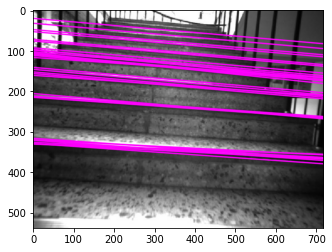

In [528]:
step_count = 0
intercepts_list = []
img_step = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
for i in range(len(slope_list)):
  # if (slope_list[i]<=(1.5*avg_slope) and slope_list[i]>=(0.85*avg_slope)):
  (pt1,pt2) = line_list[i]
  slope_list[i] = avg_slope
  intercepts_list.append((i,pt1[1]-avg_slope*pt1[0]))
  step_count+=1
  cv2.line(img_step,pt1,pt2,(255,0,255),2,cv2.LINE_AA)
  # else:
  slope_list[i] = 0
print(step_count,intercepts_list)
plt.imshow(img_step)
plt.show()

In [529]:
intercepts_list.sort(key=lambda x:x[1])

In [530]:
intercepts_list

[(17, 11.649710602796702),
 (22, 23.728596972508626),
 (15, 39.8863697119325),
 (10, 44.8863697119325),
 (13, 64.04414245135636),
 (9, 68.04414245135636),
 (27, 70.20191519078023),
 (18, 79.28080156049216),
 (23, 84.20191519078023),
 (11, 90.20191519078023),
 (21, 94.28080156049216),
 (16, 100.28080156049216),
 (3, 103.28080156049216),
 (28, 125.28080156049216),
 (7, 132.51746066962795),
 (1, 137.51746066962795),
 (5, 143.5963470393399),
 (6, 147.5963470393399),
 (20, 169.51746066962795),
 (19, 196.99077888789955),
 (12, 220.8330061484757),
 (24, 223.8330061484757),
 (2, 325.3852107364592),
 (4, 330.3852107364592),
 (0, 338.46409710617115),
 (8, 347.0696652576115),
 (26, 353.0696652576115),
 (14, 357.0696652576115),
 (25, 374.6752334090518)]

In [531]:
# intcp = [(x[0],x[1] for x in intercepts_list]
final_lines = []
for k, g in itertools.groupby(intercepts_list, key=lambda n: n[1]//30):
  final_lines.append((list(g)[len(list(g))//2]))

In [532]:
final_lines

[(17, 11.649710602796702),
 (15, 39.8863697119325),
 (13, 64.04414245135636),
 (11, 90.20191519078023),
 (28, 125.28080156049216),
 (20, 169.51746066962795),
 (19, 196.99077888789955),
 (12, 220.8330061484757),
 (2, 325.3852107364592),
 (4, 330.3852107364592),
 (25, 374.6752334090518)]

(-997, -67) (994, 107)
(357, 20)
(-1000, -39) (992, 134)
(355, 47)
(-1002, -15) (989, 158)
(352, 71)
(-1004, 11) (987, 185)
(350, 98)
(-1005, 46) (989, 186)
(351, 116)
(-1008, 90) (986, 230)
(348, 160)
(-1014, 117) (978, 291)
(341, 204)
(-1012, 141) (982, 281)
(344, 211)
(-1019, 245) (975, 384)
(337, 314)
(-1019, 250) (975, 389)
(337, 319)
(-1010, 295) (987, 365)
(347, 330)
11


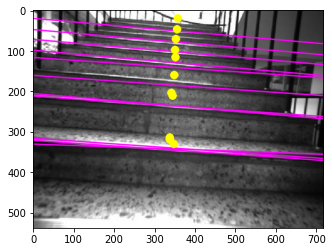

In [533]:
step_close = 0
mid_pts = []
img_step1 = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
for i in range(len(final_lines)):
    (pt1,pt2) = line_list[final_lines[i][0]]
    step_close+=1
    mid_pt = ((pt1[0]+pt2[0])//2+img_step.shape[1]//2,(pt1[1]+pt2[1])//2)
    print (pt1,pt2)
    print (mid_pt)
    mid_pts.append(mid_pt)
    cv2.circle(img_step1, mid_pt,5, (255,255,0), 10)
    cv2.line(img_step1,pt1,pt2,(255,0,255),2,cv2.LINE_AA)
print (step_close)
plt.imshow(img_step1)
plt.show()


In [534]:
mid_pts

[(357, 20),
 (355, 47),
 (352, 71),
 (350, 98),
 (351, 116),
 (348, 160),
 (341, 204),
 (344, 211),
 (337, 314),
 (337, 319),
 (347, 330)]

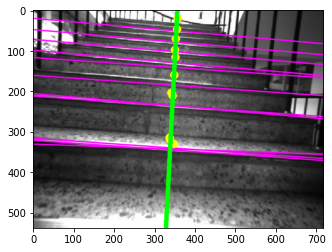

In [535]:
rows,cols = img_step1.shape[:2]
[vx,vy,x,y] = cv2.fitLine(np.float32(mid_pts),cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img_step1,(cols-1,righty),(0,lefty),(0,255,0),10)
plt.imshow(img_step1)
plt.show()